<a href="https://colab.research.google.com/github/Enriquea017/Actividad-1-Regresi-n-Lineal-/blob/main/Actividad1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from turtle import color
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('hawaii_limpio_completo2.csv')

In [3]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       '

In [4]:
pd.unique(df['room_type'])

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [7]:
#Segmentación por tipo de habitación

entire_home_apt_df = df[df['room_type'] == 'Entire home/apt'].copy()
private_room_df = df[df['room_type'] == 'Private room'].copy()
hotel_room_df = df[df['room_type'] == 'Hotel room'].copy()
shared_room_df = df[df['room_type'] == 'Shared room'].copy()

print(f"- entire_home_apt_df (Shape: {entire_home_apt_df.shape})")
print(f"- private_room_df (Shape: {private_room_df.shape})")
print(f"- hotel_room_df (Shape: {hotel_room_df.shape})")
print(f"- shared_room_df (Shape: {shared_room_df.shape})")

- entire_home_apt_df (Shape: (27460, 77))
- private_room_df (Shape: (3319, 77))
- hotel_room_df (Shape: (407, 77))
- shared_room_df (Shape: (22, 77))


# Entire Home

In [15]:
# Clean and convert percentage columns to numeric if they are not already
if entire_home_apt_df['host_response_rate'].dtype == 'object':
    entire_home_apt_df['host_response_rate'] = entire_home_apt_df['host_response_rate'].str.replace('%', '', errors='coerce').astype(float) / 100

if entire_home_apt_df['host_acceptance_rate'].dtype == 'object':
    entire_home_apt_df['host_acceptance_rate'] = entire_home_apt_df['host_acceptance_rate'].str.replace('%', '', errors='coerce').astype(float) / 100

# Clean and convert 'price' column to numeric if it's an object type
if entire_home_apt_df['price'].dtype == 'object':
    entire_home_apt_df['price'] = entire_home_apt_df['price'].str.replace('$', '', errors='coerce').astype(float)

# Calculate the correlations
correlation1 = entire_home_apt_df['host_response_rate'].corr(entire_home_apt_df['host_acceptance_rate'])
correlation2 = entire_home_apt_df['host_acceptance_rate'].corr(entire_home_apt_df['price'])
correlation3 = entire_home_apt_df['host_acceptance_rate'].corr(entire_home_apt_df['number_of_reviews'])


print("host_response_rate vs host_acceptance_rate correlación:", correlation1)
print("host_acceptance_rate vs price correlación:", correlation2)
print("host_acceptance_rate vs number_of_reviews correlación:", correlation3)

host_response_rate vs host_acceptance_rate correlación: 0.5932185943458674
host_acceptance_rate vs price correlación: -0.008442245903008757
host_acceptance_rate vs number_of_reviews correlación: 0.17593922178048596


In [16]:
# Calculate additional correlations for the entire_home_apt_df
correlation4 = entire_home_apt_df['review_scores_rating'].corr(entire_home_apt_df['calculated_host_listings_count'])
correlation5 = entire_home_apt_df['availability_365'].corr(entire_home_apt_df['number_of_reviews'])
correlation6 = entire_home_apt_df['reviews_per_month'].corr(entire_home_apt_df['review_scores_communication'])

print("review_scores_rating vs calculated_host_listings_count correlación (Entire home/apt):", correlation4)
print("availability_365 vs number_of_reviews correlación (Entire home/apt):", correlation5)
print("reviews_per_month vs review_scores_communication correlación (Entire home/apt):", correlation6)

review_scores_rating vs calculated_host_listings_count correlación (Entire home/apt): -0.12199430396558801
availability_365 vs number_of_reviews correlación (Entire home/apt): 0.041336219098133654
reviews_per_month vs review_scores_communication correlación (Entire home/apt): 0.4099040591010375


In [18]:
# Create a dictionary with correlation names and values
correlation_data1 = {
    'Correlation': [
        'host_response_rate vs host_acceptance_rate (Entire home/apt)',
        'host_acceptance_rate vs price (Entire home/apt)',
        'host_acceptance_rate vs number_of_reviews (Entire home/apt)',
        'review_scores_rating vs calculated_host_listings_count (Entire home/apt)',
        'availability_365 vs number_of_reviews (Entire home/apt)',
        'reviews_per_month vs review_scores_communication (Entire home/apt)'
    ],
    'Value': [
        correlation1,
        correlation2,
        correlation3,
        correlation4,
        correlation5,
        correlation6
    ]
}

# Create a pandas DataFrame from the dictionary
correlation_table1 = pd.DataFrame(correlation_data1)

# Display the table
display(correlation_table1)

,Correlation,Value
0,host_response_rate vs host_acceptance_rate (En...,0.593219
1,host_acceptance_rate vs price (Entire home/apt),-0.008442
2,host_acceptance_rate vs number_of_reviews (Ent...,0.175939
3,review_scores_rating vs calculated_host_listin...,-0.121994
4,availability_365 vs number_of_reviews (Entire ...,0.041336
5,reviews_per_month vs review_scores_communicati...,0.409904


# Private room

In [27]:
# Clean and convert percentage columns to numeric if they are not already
if private_room_df['host_response_rate'].dtype == 'object':
    private_room_df['host_response_rate'] = private_room_df['host_response_rate'].str.replace('%', '', errors='coerce').astype(float) / 100

if private_room_df['host_acceptance_rate'].dtype == 'object':
    private_room_df['host_acceptance_rate'] = private_room_df['host_acceptance_rate'].str.replace('%', '', errors='coerce').astype(float) / 100

# Clean and convert 'price' column to numeric if it's an object type
if private_room_df['price'].dtype == 'object':
    private_room_df['price'] = private_room_df['price'].str.replace('$', '', errors='coerce').astype(float)

# Calculate the correlations
private_correlation7 = private_room_df['host_response_rate'].corr(private_room_df['host_acceptance_rate'])
private_correlation8 = private_room_df['host_acceptance_rate'].corr(private_room_df['price'])
private_correlation9 = private_room_df['host_acceptance_rate'].corr(private_room_df['number_of_reviews'])


print("host_response_rate vs host_acceptance_rate correlación (Private room):", private_correlation7)
print("host_acceptance_rate vs price correlación (Private room):", private_correlation8)
print("host_acceptance_rate vs number_of_reviews correlación (Private room):", private_correlation9)

host_response_rate vs host_acceptance_rate correlación (Private room): 0.600167497932367
host_acceptance_rate vs price correlación (Private room): -0.2529715880981872
host_acceptance_rate vs number_of_reviews correlación (Private room): 0.1880348668290683


In [33]:
correlation10 = private_room_df['review_scores_rating'].corr(private_room_df['calculated_host_listings_count'])
correlation11 = private_room_df['availability_365'].corr(private_room_df['number_of_reviews'])
correlation12 = private_room_df['reviews_per_month'].corr(private_room_df['review_scores_communication'])

print("review_scores_rating vs calculated_host_listings_count correlación (Entire home/apt):", correlation10)
print("availability_365 vs number_of_reviews correlación (Entire home/apt):", correlation11)
print("reviews_per_month vs review_scores_communication correlación (Entire home/apt):", correlation12)

review_scores_rating vs calculated_host_listings_count correlación (Entire home/apt): -0.13157835590468653
availability_365 vs number_of_reviews correlación (Entire home/apt): 0.10806770264868365
reviews_per_month vs review_scores_communication correlación (Entire home/apt): 0.45272017383148644


In [34]:
# Create a dictionary with correlation names and values for Private room
private_correlation_data = {
    'Correlation': [
        'host_response_rate vs host_acceptance_rate (Private room)',
        'host_acceptance_rate vs price (Private room)',
        'host_acceptance_rate vs number_of_reviews (Private room)',
        'review_scores_rating vs calculated_host_listings_count (Private room)',
        'availability_365 vs number_of_reviews (Private room)',
        'reviews_per_month vs review_scores_communication (Private room)'
    ],
    'Value': [
        private_correlation7,
        private_correlation8,
        private_correlation9,
        correlation10,
        correlation11,
        correlation12
    ]
}

# Create a pandas DataFrame from the dictionary
private_correlation_table = pd.DataFrame(private_correlation_data)

# Display the table
display(private_correlation_table)

,Correlation,Value
0,host_response_rate vs host_acceptance_rate (Pr...,0.600167
1,host_acceptance_rate vs price (Private room),-0.252972
2,host_acceptance_rate vs number_of_reviews (Pri...,0.188035
3,review_scores_rating vs calculated_host_listin...,-0.131578
4,availability_365 vs number_of_reviews (Private...,0.108068
5,reviews_per_month vs review_scores_communicati...,0.452720


# Hotel room

In [36]:
# Clean and convert percentage columns to numeric if they are not already
if hotel_room_df['host_response_rate'].dtype == 'object':
    hotel_room_df['host_response_rate'] = hotel_room_df['host_response_rate'].str.replace('%', '').astype(float) / 100

if hotel_room_df['host_acceptance_rate'].dtype == 'object':
    hotel_room_df['host_acceptance_rate'] = hotel_room_df['host_acceptance_rate'].str.replace('%', '').astype(float) / 100

# Clean and convert 'price' column to numeric if it's an object type
if hotel_room_df['price'].dtype == 'object':
    hotel_room_df['price'] = hotel_room_df['price'].str.replace('$', '').astype(float)

# Calculate the correlations
correlation13 = hotel_room_df['host_response_rate'].corr(hotel_room_df['host_acceptance_rate'])
correlation14 = hotel_room_df['host_acceptance_rate'].corr(hotel_room_df['price'])
correlation15 = hotel_room_df['host_acceptance_rate'].corr(hotel_room_df['number_of_reviews'])


print("host_response_rate vs host_acceptance_rate correlación (Hotel room):", correlation13)
print("host_acceptance_rate vs price correlación (Hotel room):", correlation14)
print("host_acceptance_rate vs number_of_reviews correlación (Hotel room):", correlation15)

host_response_rate vs host_acceptance_rate correlación (Hotel room): 0.3680079958472657
host_acceptance_rate vs price correlación (Hotel room): -0.011818061018032712
host_acceptance_rate vs number_of_reviews correlación (Hotel room): 0.04353202128357259


In [37]:
# Calculate additional correlations for the hotel_room_df
correlation16 = hotel_room_df['review_scores_rating'].corr(hotel_room_df['calculated_host_listings_count'])
correlation17 = hotel_room_df['availability_365'].corr(hotel_room_df['number_of_reviews'])
correlation18 = hotel_room_df['reviews_per_month'].corr(hotel_room_df['review_scores_communication'])

print("review_scores_rating vs calculated_host_listings_count correlación (Hotel room):", correlation16)
print("availability_365 vs number_of_reviews correlación (Hotel room):", correlation17)
print("reviews_per_month vs review_scores_communication correlación (Hotel room):", correlation18)

review_scores_rating vs calculated_host_listings_count correlación (Hotel room): -0.27961234888605324
availability_365 vs number_of_reviews correlación (Hotel room): 0.021985202616903777
reviews_per_month vs review_scores_communication correlación (Hotel room): 0.5350267761698754


In [38]:
# Create a dictionary with correlation names and values for Hotel room
hotel_correlation_data = {
    'Correlation': [
        'host_response_rate vs host_acceptance_rate (Hotel room)',
        'host_acceptance_rate vs price (Hotel room)',
        'host_acceptance_rate vs number_of_reviews (Hotel room)',
        'review_scores_rating vs calculated_host_listings_count (Hotel room)',
        'availability_365 vs number_of_reviews (Hotel room)',
        'reviews_per_month vs review_scores_communication (Hotel room)'
    ],
    'Value': [
        correlation13,
        correlation14,
        correlation15,
        correlation16,
        correlation17,
        correlation18
    ]
}

# Create a pandas DataFrame from the dictionary
hotel_correlation_table = pd.DataFrame(hotel_correlation_data)

# Display the table
display(hotel_correlation_table)

,Correlation,Value
0,host_response_rate vs host_acceptance_rate (Ho...,0.368008
1,host_acceptance_rate vs price (Hotel room),-0.011818
2,host_acceptance_rate vs number_of_reviews (Hot...,0.043532
3,review_scores_rating vs calculated_host_listin...,-0.279612
4,availability_365 vs number_of_reviews (Hotel r...,0.021985
5,reviews_per_month vs review_scores_communicati...,0.535027


# Shared room

In [40]:
# Clean and convert percentage columns to numeric if they are not already
if shared_room_df['host_response_rate'].dtype == 'object':
    shared_room_df['host_response_rate'] = shared_room_df['host_response_rate'].str.replace('%', '').astype(float) / 100

if shared_room_df['host_acceptance_rate'].dtype == 'object':
    shared_room_df['host_acceptance_rate'] = shared_room_df['host_acceptance_rate'].str.replace('%', '').astype(float) / 100

# Clean and convert 'price' column to numeric if it's an object type
if shared_room_df['price'].dtype == 'object':
    shared_room_df['price'] = shared_room_df['price'].str.replace('$', '').astype(float)

# Calculate the correlations
correlation19 = shared_room_df['host_response_rate'].corr(shared_room_df['host_acceptance_rate'])
correlation20 = shared_room_df['host_acceptance_rate'].corr(shared_room_df['price'])
correlation21 = shared_room_df['host_acceptance_rate'].corr(shared_room_df['number_of_reviews'])


print("host_response_rate vs host_acceptance_rate correlación (Shared room):", correlation19)
print("host_acceptance_rate vs price correlación (Shared room):", correlation20)
print("host_acceptance_rate vs number_of_reviews correlación (Shared room):", correlation21)

host_response_rate vs host_acceptance_rate correlación (Shared room): 0.814401182645997
host_acceptance_rate vs price correlación (Shared room): -0.7148655472424388
host_acceptance_rate vs number_of_reviews correlación (Shared room): 0.3846243001794871


In [41]:
# Calculate additional correlations for the shared_room_df
correlation22 = shared_room_df['review_scores_rating'].corr(shared_room_df['calculated_host_listings_count'])
correlation23 = shared_room_df['availability_365'].corr(shared_room_df['number_of_reviews'])
correlation24 = shared_room_df['reviews_per_month'].corr(shared_room_df['review_scores_communication'])

print("review_scores_rating vs calculated_host_listings_count correlación (Shared room):", correlation22)
print("availability_365 vs number_of_reviews correlación (Shared room):", correlation23)
print("reviews_per_month vs review_scores_communication correlación (Shared room):", correlation24)

review_scores_rating vs calculated_host_listings_count correlación (Shared room): 0.3690204358919764
availability_365 vs number_of_reviews correlación (Shared room): 0.15728615397559953
reviews_per_month vs review_scores_communication correlación (Shared room): 0.4485454058017588


In [42]:
# Create a dictionary with correlation names and values for Shared room
shared_correlation_data = {
    'Correlation': [
        'host_response_rate vs host_acceptance_rate (Shared room)',
        'host_acceptance_rate vs price (Shared room)',
        'host_acceptance_rate vs number_of_reviews (Shared room)',
        'review_scores_rating vs calculated_host_listings_count (Shared room)',
        'availability_365 vs number_of_reviews (Shared room)',
        'reviews_per_month vs review_scores_communication (Shared room)'
    ],
    'Value': [
        correlation19,
        correlation20,
        correlation21,
        correlation22,
        correlation23,
        correlation24
    ]
}

# Create a pandas DataFrame from the dictionary
shared_correlation_table = pd.DataFrame(shared_correlation_data)

# Display the table
display(shared_correlation_table)

,Correlation,Value
0,host_response_rate vs host_acceptance_rate (Sh...,0.814401
1,host_acceptance_rate vs price (Shared room),-0.714866
2,host_acceptance_rate vs number_of_reviews (Sha...,0.384624
3,review_scores_rating vs calculated_host_listin...,0.369020
4,availability_365 vs number_of_reviews (Shared ...,0.157286
5,reviews_per_month vs review_scores_communicati...,0.448545


# Gráficas de correlación

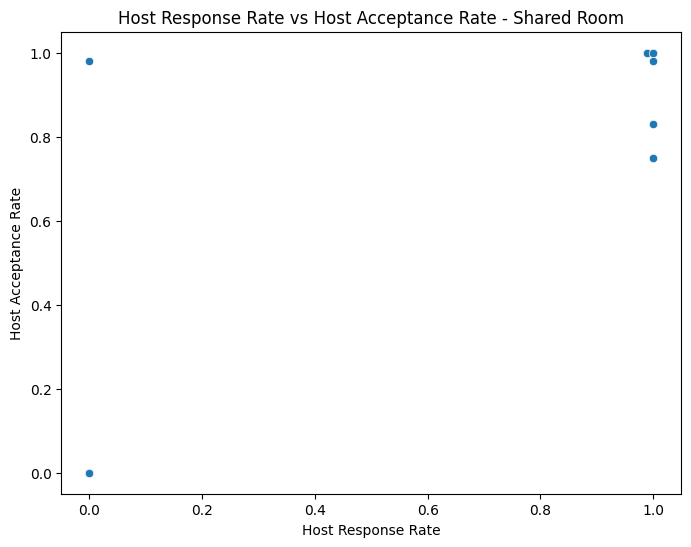

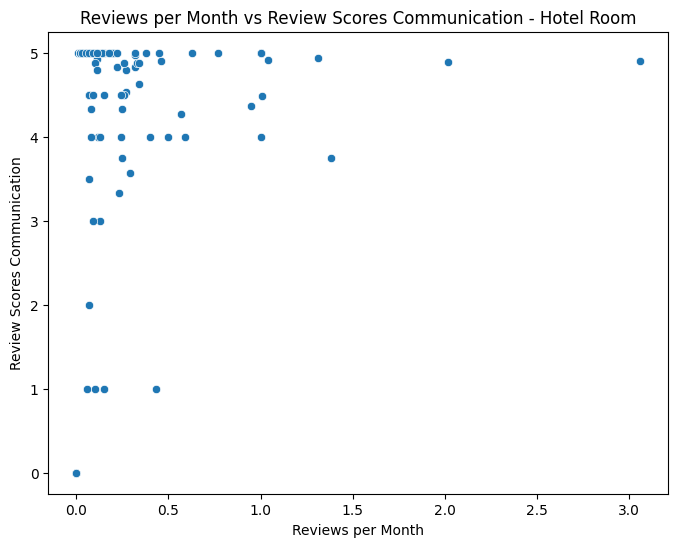

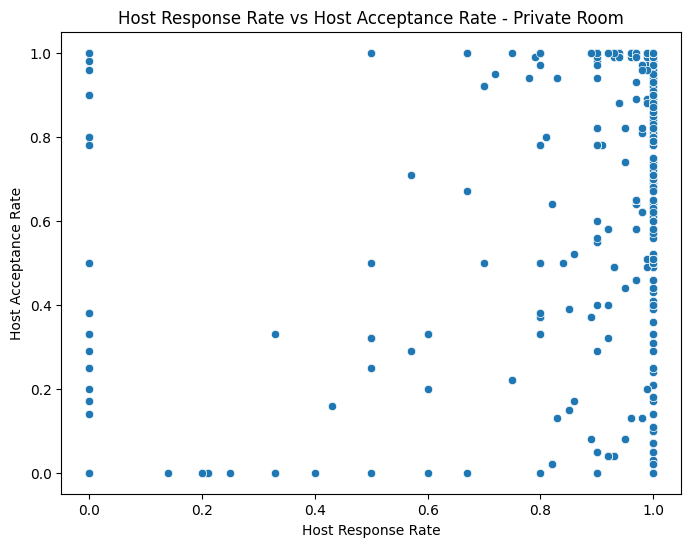

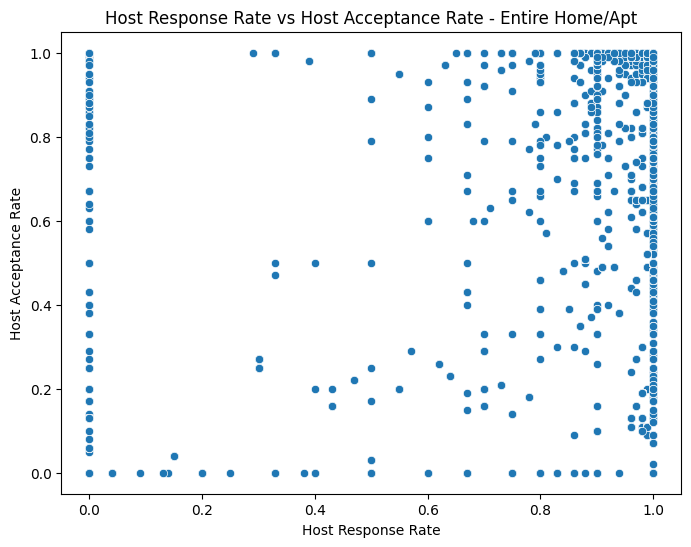

In [43]:
# Scatter plot for Host response rate vs host acceptance rate - Shared room
plt.figure(figsize=(8, 6))
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', data=shared_room_df)
plt.title('Host Response Rate vs Host Acceptance Rate - Shared Room')
plt.xlabel('Host Response Rate')
plt.ylabel('Host Acceptance Rate')
plt.show()

# Scatter plot for Reviews per month vs review scores communication - Hotel room
plt.figure(figsize=(8, 6))
sns.scatterplot(x='reviews_per_month', y='review_scores_communication', data=hotel_room_df)
plt.title('Reviews per Month vs Review Scores Communication - Hotel Room')
plt.xlabel('Reviews per Month')
plt.ylabel('Review Scores Communication')
plt.show()

# Scatter plot for Host response rate vs host acceptance rate - Private room
plt.figure(figsize=(8, 6))
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', data=private_room_df)
plt.title('Host Response Rate vs Host Acceptance Rate - Private Room')
plt.xlabel('Host Response Rate')
plt.ylabel('Host Acceptance Rate')
plt.show()

# Scatter plot for Host response rate vs host acceptance rate - Entire home/apt
plt.figure(figsize=(8, 6))
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', data=entire_home_apt_df)
plt.title('Host Response Rate vs Host Acceptance Rate - Entire Home/Apt')
plt.xlabel('Host Response Rate')
plt.ylabel('Host Acceptance Rate')
plt.show()

# Task
Divide the columns of the original dataframe `df` into qualitative and quantitative variables. Identify columns with '%' or '$' signs and convert them to numeric types before classification.

## Identify initial column types

### Subtask:
Determine the initial data types of all columns in the original `df`.


**Reasoning**:
Display the data types of the columns in the DataFrame to understand their initial classification.



In [44]:
display(df.dtypes)

,0
id,int64
listing_url,object
scrape_id,int64
last_scraped,object
source,object
...,...
calculated_host_listings_count,int64
calculated_host_listings_count_entire_homes,int64
calculated_host_listings_count_private_rooms,int64
calculated_host_listings_count_shared_rooms,int64


Separación de cualitativas de cuantitativas

In [55]:
cuantitativas = df[[
       'host_response_rate', 'host_acceptance_rate',
       'host_total_listings_count', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'price', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'number_of_reviews_ly', 'estimated_occupancy_l365d',
       'estimated_revenue_l365d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month']]

In [49]:
pd.set_option('display.max_columns', None)

In [56]:
display(cuantitativas.head())

,host_response_rate,host_acceptance_rate,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,100,96,6.0,2,1,1,1,128.0,3,1125,3,3,1125,1125,3.0,1125.0,8,8,8,8,40,6,1,6,36,4608.000000,4.78,4.88,4.55,4.95,4.85,5.00,4.85,3,3,0,0,0.24
1,100,96,3.0,2,1,0,2,97.0,5,60,5,5,1125,1125,5.0,1125.0,2,22,48,250,231,13,0,14,130,12610.000000,4.67,4.69,4.42,4.85,4.88,4.74,4.78,2,2,0,0,1.26
2,0,0,3.0,2,1,1,1,117.0,2,60,2,2,60,60,2.0,60.0,30,60,90,365,0,0,0,0,0,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3,0,3,0,0.00
3,0,0,3.0,4,2,2,3,803.5,7,730,7,7,730,730,7.0,730.0,0,0,0,0,0,0,0,0,0,4719.909091,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,1,0,0,0.00
4,100,0,4.0,4,0,1,1,98.0,1,1125,1,1,1125,1125,1.0,1125.0,30,60,90,269,128,0,0,0,0,0.000000,4.65,4.65,4.70,4.79,4.76,4.25,4.60,1,1,0,0,0.72


In [53]:
# Remove percentage signs from columns if they are object type
if df['host_response_rate'].dtype == 'object':
    df['host_response_rate'] = df['host_response_rate'].str.replace('%', '')

if df['host_acceptance_rate'].dtype == 'object':
    df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '')

# Display the data types to confirm the change
display(df[['host_response_rate', 'host_acceptance_rate']].dtypes)

,0
host_response_rate,object
host_acceptance_rate,object


In [58]:
Corr_Factors=cuantitativas.corr()
Corr_Factors

,host_response_rate,host_acceptance_rate,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
host_response_rate,1.000000,0.600291,0.075941,0.026843,0.062563,0.002948,0.052504,-0.051564,-0.137133,0.143733,-0.166115,-0.022861,-0.015880,0.089190,-0.150042,0.030908,0.061283,0.085248,0.100212,0.142512,0.066195,0.109805,0.099276,0.099579,0.102803,0.046091,0.099538,0.101658,0.099695,0.101723,0.099732,0.103431,0.097121,0.187820,0.180331,0.067745,0.006773,0.092214
host_acceptance_rate,0.600291,1.000000,-0.054080,-0.033712,0.066279,0.006049,0.041613,-0.067721,-0.109434,0.227967,-0.133527,0.010933,0.044004,0.243325,-0.108344,0.136696,-0.125457,-0.081144,-0.024269,0.203421,0.183072,0.233851,0.182307,0.224526,0.235729,0.177065,0.260632,0.266328,0.259600,0.266073,0.264100,0.267848,0.257572,0.141648,0.146242,-0.080758,0.015162,0.231029
host_total_listings_count,0.075941,-0.054080,1.000000,0.067014,0.007466,0.013089,0.026125,0.105785,-0.084773,0.131145,-0.098507,-0.033620,-0.129304,0.027331,-0.105336,-0.101455,0.083715,0.074192,0.064453,0.053627,-0.166660,-0.160941,-0.131995,-0.156743,-0.177997,-0.169288,-0.237207,-0.239084,-0.233341,-0.239882,-0.241091,-0.235165,-0.238970,0.372030,0.286332,0.201797,-0.012577,-0.186729
accommodates,0.026843,-0.033712,0.067014,1.000000,0.600808,0.754737,0.747655,0.386291,-0.051076,0.034141,-0.054201,0.002912,-0.093356,-0.064576,-0.047318,-0.083499,-0.076978,-0.062733,-0.076807,-0.046435,-0.169340,-0.148204,-0.124075,-0.147154,-0.169064,0.065673,-0.070151,-0.073322,-0.071314,-0.075247,-0.075964,-0.073266,-0.077223,0.146886,0.145173,0.022503,-0.041452,-0.178176
bathrooms,0.062563,0.066279,0.007466,0.600808,1.000000,0.691087,0.622700,0.349605,-0.010866,0.125292,-0.005135,0.026701,-0.099713,-0.003584,0.008485,-0.060112,-0.046200,-0.015645,-0.013311,0.053422,-0.120555,-0.126759,-0.104006,-0.126020,-0.128301,0.057643,0.015764,0.014247,0.014763,0.009721,0.007278,0.011752,0.007845,0.175458,0.187126,-0.056807,-0.019979,-0.160162
bedrooms,0.002948,0.006049,0.013089,0.754737,0.691087,1.000000,0.672221,0.355732,0.059291,0.069178,0.077169,0.038796,-0.062851,-0.028027,0.088084,-0.049006,-0.086524,-0.067364,-0.074689,-0.017516,-0.137325,-0.155382,-0.122570,-0.152564,-0.134768,0.112656,-0.023318,-0.025551,-0.025560,-0.029087,-0.030072,-0.031596,-0.029748,0.091870,0.096652,-0.042808,-0.030824,-0.181999
beds,0.052504,0.041613,0.026125,0.747655,0.622700,0.672221,1.000000,0.328877,-0.022733,0.093465,-0.020123,-0.013416,-0.063565,0.000273,-0.009214,-0.033622,-0.068288,-0.041740,-0.041953,0.023286,-0.102070,-0.088738,-0.081698,-0.086899,-0.092609,0.092970,0.000654,-0.001344,-0.001167,-0.002821,-0.004736,-0.001659,-0.005673,0.146841,0.153016,-0.011539,-0.018667,-0.117552
price,-0.051564,-0.067721,0.105785,0.386291,0.349605,0.355732,0.328877,1.000000,-0.076169,0.061828,-0.098431,-0.048727,-0.142080,-0.042453,-0.099508,-0.102690,-0.045150,-0.051684,-0.069891,-0.043210,-0.236288,-0.255797,-0.207736,-0.249988,-0.283280,-0.016145,-0.229303,-0.233152,-0.227526,-0.237191,-0.237747,-0.232796,-0.238313,0.155912,0.133420,0.167903,-0.030785,-0.288498
minimum_nights,-0.137133,-0.109434,-0.084773,-0.051076,-0.010866,0.059291,-0.022733,-0.076169,1.000000,-0.051535,0.759014,0.296833,0.077614,-0.036428,0.784877,0.033149,0.008502,0.01

In [59]:
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,host_response_rate,host_acceptance_rate,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
host_response_rate,1.000000,0.600291,0.075941,0.026843,0.062563,0.002948,0.052504,0.051564,0.137133,0.143733,0.166115,0.022861,0.015880,0.089190,0.150042,0.030908,0.061283,0.085248,0.100212,0.142512,0.066195,0.109805,0.099276,0.099579,0.102803,0.046091,0.099538,0.101658,0.099695,0.101723,0.099732,0.103431,0.097121,0.187820,0.180331,0.067745,0.006773,0.092214
host_acceptance_rate,0.600291,1.000000,0.054080,0.033712,0.066279,0.006049,0.041613,0.067721,0.109434,0.227967,0.133527,0.010933,0.044004,0.243325,0.108344,0.136696,0.125457,0.081144,0.024269,0.203421,0.183072,0.233851,0.182307,0.224526,0.235729,0.177065,0.260632,0.266328,0.259600,0.266073,0.264100,0.267848,0.257572,0.141648,0.146242,0.080758,0.015162,0.231029
host_total_listings_count,0.075941,0.054080,1.000000,0.067014,0.007466,0.013089,0.026125,0.105785,0.084773,0.131145,0.098507,0.033620,0.129304,0.027331,0.105336,0.101455,0.083715,0.074192,0.064453,0.053627,0.166660,0.160941,0.131995,0.156743,0.177997,0.169288,0.237207,0.239084,0.233341,0.239882,0.241091,0.235165,0.238970,0.372030,0.286332,0.201797,0.012577,0.186729
accommodates,0.026843,0.033712,0.067014,1.000000,0.600808,0.754737,0.747655,0.386291,0.051076,0.034141,0.054201,0.002912,0.093356,0.064576,0.047318,0.083499,0.076978,0.062733,0.076807,0.046435,0.169340,0.148204,0.124075,0.147154,0.169064,0.065673,0.070151,0.073322,0.071314,0.075247,0.075964,0.073266,0.077223,0.146886,0.145173,0.022503,0.041452,0.178176
bathrooms,0.062563,0.066279,0.007466,0.600808,1.000000,0.691087,0.622700,0.349605,0.010866,0.125292,0.005135,0.026701,0.099713,0.003584,0.008485,0.060112,0.046200,0.015645,0.013311,0.053422,0.120555,0.126759,0.104006,0.126020,0.128301,0.057643,0.015764,0.014247,0.014763,0.009721,0.007278,0.011752,0.007845,0.175458,0.187126,0.056807,0.019979,0.160162
bedrooms,0.002948,0.006049,0.013089,0.754737,0.691087,1.000000,0.672221,0.355732,0.059291,0.069178,0.077169,0.038796,0.062851,0.028027,0.088084,0.049006,0.086524,0.067364,0.074689,0.017516,0.137325,0.155382,0.122570,0.152564,0.134768,0.112656,0.023318,0.025551,0.025560,0.029087,0.030072,0.031596,0.029748,0.091870,0.096652,0.042808,0.030824,0.181999
beds,0.052504,0.041613,0.026125,0.747655,0.622700,0.672221,1.000000,0.328877,0.022733,0.093465,0.020123,0.013416,0.063565,0.000273,0.009214,0.033622,0.068288,0.041740,0.041953,0.023286,0.102070,0.088738,0.081698,0.086899,0.092609,0.092970,0.000654,0.001344,0.001167,0.002821,0.004736,0.001659,0.005673,0.146841,0.153016,0.011539,0.018667,0.117552
price,0.051564,0.067721,0.105785,0.386291,0.349605,0.355732,0.328877,1.000000,0.076169,0.061828,0.098431,0.048727,0.142080,0.042453,0.099508,0.102690,0.045150,0.051684,0.069891,0.043210,0.236288,0.255797,0.207736,0.249988,0.283280,0.016145,0.229303,0.233152,0.227526,0.237191,0.237747,0.232796,0.238313,0.155912,0.133420,0.167903,0.030785,0.288498
minimum_nights,0.137133,0.109434,0.084773,0.051076,0.010866,0.059291,0.022733,0.076169,1.000000,0.051535,0.759014,0.296833,0.077614,0.036428,0.784877,0.033149,0.008502,0.019489,0.018899,0.003736,0.050729,0.126697,0.106662,0.118773,0.144207,0.060167,0.029852,0.031481,0.034379,0.030207,0.028696,0.035079,0.029210,0.124921,0.116963,0.0

<Axes: >

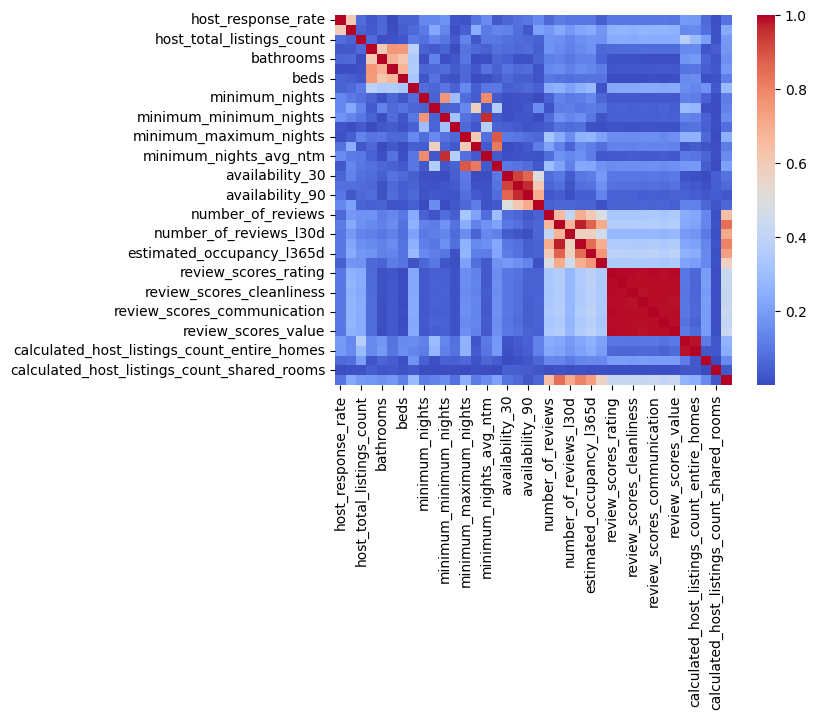

In [60]:
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'coolwarm')
Heat_Map

<Axes: >

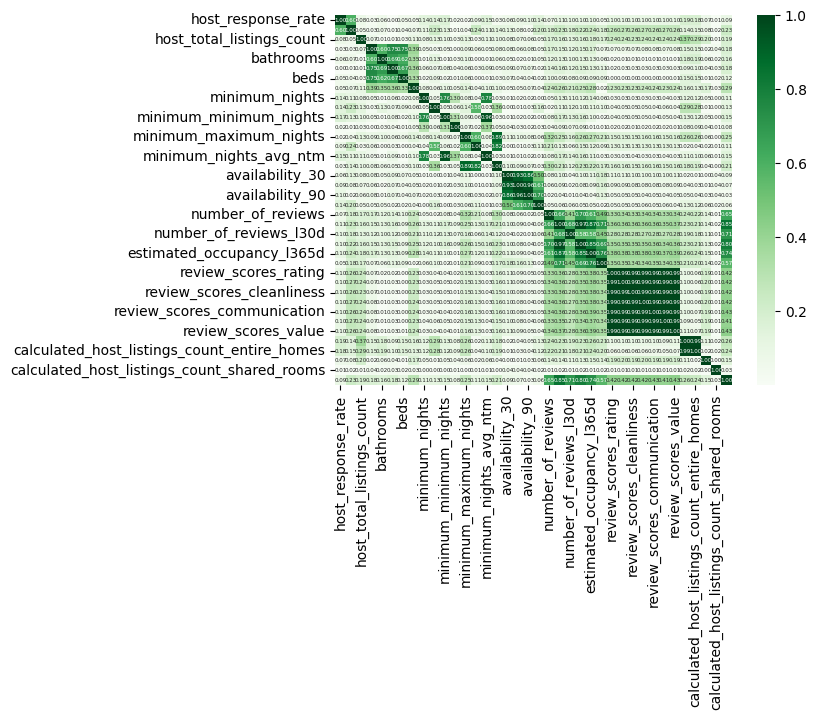

In [62]:
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'Greens', annot=True, fmt=".2f", annot_kws={'size': 4})
Heat_Map

In [75]:
import pandas as pd
import numpy as np

# Calculamos la matriz de correlaciones
corr_matrix = cuantitativas.corr()

# Usamos valor absoluto para que no importe si es positiva o negativa
corr_abs = corr_matrix.abs()

# Eliminamos la diagonal (correlación de una variable consigo misma)
upper = corr_abs.where(np.triu(np.ones(corr_abs.shape), k=1).astype(bool))

# Extraemos pares con correlación mayor a 0.5
strong_corr = (
    upper.stack()  # convierte a formato largo
         .reset_index()
)
strong_corr.columns = ["Variable_1", "Variable_2", "Correlacion"]

# Filtramos las altas
strong_corr = strong_corr[strong_corr["Correlacion"] > 0.4]

# Ordenamos de mayor a menor
strong_corr = strong_corr.sort_values(by="Correlacion", ascending=False)

display(strong_corr)

,Variable_1,Variable_2,Correlacion
637,review_scores_rating,review_scores_accuracy,0.994900
642,review_scores_rating,review_scores_value,0.993987
638,review_scores_rating,review_scores_cleanliness,0.993516
640,review_scores_rating,review_scores_communication,0.993165
652,review_scores_accuracy,review_scores_value,0.992095
667,review_scores_checkin,review_scores_communication,0.992089
650,review_scores_accuracy,review_scores_communication,0.991708
641,review_scores_rating,review_scores_location,0.991665
639,review_scores_rating,review_scores_checkin,0.991413
648,review_scores_accuracy,review_scores_cleanliness,0.991248


# Regresión lineal multiple

In [77]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

review_scores_rating

In [93]:
Vars_Indep1= df[['review_scores_rating']]
Var_Dep1= df['review_scores_value']
model.fit(X=Vars_Indep, y=Var_Dep)
modelo1 = model.__dict__
coef1 = model.score(Vars_Indep1,Var_Dep1)
print(modelo1)
print(coef1)
# Extract the intercept and coefficient from the model
intercept1 = modelo1['intercept_']
coefficient1 = modelo1['coef_'][0]

# Get the R-squared value
r_squared1 = coef1

# Print the equation and R-squared value
print(f"Linear Regression Equation:")
print(f"review_scores_value = {intercept:.4f} + {coefficient:.4f} * review_scores_rating")
print(f"R-squared: {r_squared:.4f}")

{'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['review_scores_rating'], dtype=object), 'n_features_in_': 1, 'coef_': array([0.97663825]), 'rank_': 1, 'singular_': array([353.70518932]), 'intercept_': np.float64(0.006555693811967966)}
0.9880093095667626
Linear Regression Equation:
review_scores_value = 0.0066 + 0.9766 * review_scores_rating
R-squared: 0.9880


host_acceptance_rate

In [94]:
# Select the dependent and independent variables for the multiple linear regression model
Var_Dep2 = cuantitativas['host_acceptance_rate']
# Selecting independent variables that showed relatively higher correlations with host_acceptance_rate
Vars_Indep2 = cuantitativas[['host_response_rate', 'maximum_nights', 'availability_365', 'number_of_reviews']]

# Create and fit the multiple linear regression model
model2 = LinearRegression()
model2.fit(X=Vars_Indep2, y=Var_Dep2)

# Get the model details and R-squared score
modelo2 = model2.__dict__
coef2 = model2.score(Vars_Indep2, Var_Dep2)

# Print the model details and R-squared score
print("Multiple Linear Regression Model predicting host_acceptance_rate:")
print(modelo2)
print(f"R-squared: {coef2:.4f}")

# Print the equation
print("\nMultiple Linear Regression Equation:")
equation2 = f"host_acceptance_rate = {modelo2['intercept_']:.4f}"
for i, col in enumerate(Vars_Indep2.columns):
    equation += f" + {modelo2['coef_'][i]:.4f} * {col}"
print(equation2)

Multiple Linear Regression Model predicting host_acceptance_rate:
{'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['host_response_rate', 'maximum_nights', 'availability_365',
       'number_of_reviews'], dtype=object), 'n_features_in_': 4, 'coef_': array([0.63412995, 0.00905876, 0.02329475, 0.09463106]), 'rank_': 4, 'singular_': array([80445.57823709, 21807.69299025,  8157.1262914 ,  4625.73036171]), 'intercept_': np.float64(13.121379441498746)}
R-squared: 0.4114

Multiple Linear Regression Equation:
host_acceptance_rate = 13.1214


host_total_listings_count

In [95]:
# Select the dependent and independent variables for the multiple linear regression model
Var_Dep3 = cuantitativas['host_total_listings_count']
# Selecting independent variables that showed relatively higher correlations with host_total_listings_count
Vars_Indep3 = cuantitativas[['calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms']]

# Create and fit the multiple linear regression model
model3 = LinearRegression()
model3.fit(X=Vars_Indep3, y=Var_Dep3)

# Get the model details and R-squared score
modelo3 = model3.__dict__
coef3 = model3.score(Vars_Indep3, Var_Dep3)

# Print the model details and R-squared score
print("Multiple Linear Regression Model predicting host_total_listings_count:")
print(modelo3)
print(f"R-squared: {coef3:.4f}")

# Print the equation
print("\nMultiple Linear Regression Equation:")
equation3 = f"host_total_listings_count = {modelo3['intercept_']:.4f}"
for i, col in enumerate(Vars_Indep3.columns):
    equation += f" + {modelo3['coef_'][i]:.4f} * {col}"
print(equation3)

Multiple Linear Regression Model predicting host_total_listings_count:
{'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms'], dtype=object), 'n_features_in_': 3, 'coef_': array([ 28.54446385, -26.5460363 , -14.83578129]), 'rank_': 3, 'singular_': array([30481.87339118,  2704.16605185,  1326.77901231]), 'intercept_': np.float64(43.74623995510399)}
R-squared: 0.4229

Multiple Linear Regression Equation:
host_total_listings_count = 43.7462


accommodates

In [96]:
# Select the dependent and independent variables for the multiple linear regression model
Var_Dep4 = cuantitativas['accommodates']
# Selecting independent variables that showed strong correlations with accommodates
Vars_Indep4 = cuantitativas[['bedrooms', 'beds', 'bathrooms', 'price']]

# Create and fit the multiple linear regression model
model4 = LinearRegression()
model4.fit(X=Vars_Indep4, y=Var_Dep4)

# Get the model details and R-squared score
modelo4 = model4.__dict__
coef4 = model4.score(Vars_Indep4, Var_Dep4)

# Print the model details and R-squared score
print("Multiple Linear Regression Model predicting accommodates:")
print(modelo4)
print(f"R-squared: {coef4:.4f}")

# Print the equation
print("\nMultiple Linear Regression Equation:")
equation4 = f"accommodates = {modelo4['intercept_']:.4f}"
for i, col in enumerate(Vars_Indep4.columns):
    equation += f" + {modelo4['coef_'][i]:.4f} * {col}"
print(equation4)

Multiple Linear Regression Model predicting accommodates:
{'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['bedrooms', 'beds', 'bathrooms', 'price'], dtype=object), 'n_features_in_': 4, 'coef_': array([9.19688972e-01, 7.20625187e-01, 1.75918041e-02, 5.03821016e-04]), 'rank_': 4, 'singular_': array([57008.05460282,   215.10054659,    96.16957592,    66.80613616]), 'intercept_': np.float64(1.2475012163256518)}
R-squared: 0.6822

Multiple Linear Regression Equation:
accommodates = 1.2475


bedrooms

In [97]:
# Select the dependent and independent variables for the multiple linear regression model
Var_Dep5 = cuantitativas['bedrooms']
# Selecting independent variables that showed strong correlations with bedrooms
Vars_Indep5 = cuantitativas[['accommodates', 'bathrooms', 'beds', 'price']]

# Create and fit the multiple linear regression model
model5 = LinearRegression()
model5.fit(X=Vars_Indep5, y=Var_Dep5)

# Get the model details and R-squared score
modelo5 = model5.__dict__
coef5 = model5.score(Vars_Indep5, Var_Dep5)

# Print the model details and R-squared score
print("Multiple Linear Regression Model predicting bedrooms:")
print(modelo5)
print(f"R-squared: {coef5:.4f}")

# Print the equation
print("\nMultiple Linear Regression Equation:")
equation5 = f"bedrooms = {modelo5['intercept_']:.4f}"
for i, col in enumerate(Vars_Indep5.columns):
    equation += f" + {modelo5['coef_'][i]:.4f} * {col}"
print(equation5)

Multiple Linear Regression Model predicting bedrooms:
{'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['accommodates', 'bathrooms', 'beds', 'price'], dtype=object), 'n_features_in_': 4, 'coef_': array([2.17769218e-01, 4.75338435e-01, 8.86212344e-02, 6.19462895e-05]), 'rank_': 4, 'singular_': array([57008.16067399,   326.72554123,   113.79203046,    76.38746051]), 'intercept_': np.float64(-0.43288147238084673)}
R-squared: 0.6632

Multiple Linear Regression Equation:
bedrooms = -0.4329


Price

In [98]:
# Select the dependent and independent variables for the multiple linear regression model
Var_Dep6 = cuantitativas['price']
# Selecting independent variables that showed strong correlations with price
Vars_Indep6 = cuantitativas[['accommodates', 'bathrooms', 'bedrooms', 'beds']]

# Create and fit the multiple linear regression model
model6 = LinearRegression()
model6.fit(X=Vars_Indep6, y=Var_Dep6)

# Get the model details and R-squared score
modelo6 = model6.__dict__
coef6 = model6.score(Vars_Indep6, Var_Dep6)

# Print the model details and R-squared score
print("Multiple Linear Regression Model predicting price:")
print(modelo6)
print(f"R-squared: {coef6:.4f}")

# Print the equation
print("\nMultiple Linear Regression Equation:")
equation6 = f"price = {modelo6['intercept_']:.4f}"
for i, col in enumerate(Vars_Indep6.columns):
    equation += f" + {modelo6['coef_'][i]:.4f} * {col}"
print(equation6)

Multiple Linear Regression Model predicting price:
{'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['accommodates', 'bathrooms', 'bedrooms', 'beds'], dtype=object), 'n_features_in_': 4, 'coef_': array([42.65115232, 85.0299139 , 22.14696789,  4.40663947]), 'rank_': 4, 'singular_': array([375.8046941 , 115.17331102,  95.31463172,  65.63430917]), 'intercept_': np.float64(29.094961394034442)}
R-squared: 0.1721

Multiple Linear Regression Equation:
price = 29.0950


review_scores_value

In [99]:
# Select the dependent and independent variables for the multiple linear regression model
Var_Dep7 = cuantitativas['review_scores_value']
# Selecting independent variables that showed high correlations with review_scores_value
# Note: These variables are highly correlated with the dependent variable and each other.
Vars_Indep7 = cuantitativas[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness']]

# Create and fit the multiple linear regression model
model7 = LinearRegression()
model7.fit(X=Vars_Indep7, y=Var_Dep7)

# Get the model details and R-squared score
modelo7 = model7.__dict__
coef7 = model7.score(Vars_Indep7, Var_Dep7)

# Print the model details and R-squared score
print("Multiple Linear Regression Model predicting review_scores_value:")
print(modelo7)
print(f"R-squared: {coef7:.4f}")

# Print the equation
print("\nMultiple Linear Regression Equation:")
equation7 = f"review_scores_value = {modelo7['intercept_']:.4f}"
for i, col in enumerate(Vars_Indep7.columns):
    equation += f" + {modelo7['coef_'][i]:.4f} * {col}"
print(equation7)

Multiple Linear Regression Model predicting review_scores_value:
{'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness'], dtype=object), 'n_features_in_': 3, 'coef_': array([0.56016363, 0.26322596, 0.15487019]), 'rank_': 3, 'singular_': array([611.60509582,  33.3868109 ,  24.14211537]), 'intercept_': np.float64(-0.0009139591409570436)}
R-squared: 0.9893

Multiple Linear Regression Equation:
review_scores_value = -0.0009


bathrooms

In [100]:
# Select the dependent and independent variables for the multiple linear regression model
Var_Dep8 = cuantitativas['bathrooms']
# Selecting independent variables that showed strong correlations with bathrooms
Vars_Indep8 = cuantitativas[['accommodates', 'bedrooms', 'beds', 'price']]

# Create and fit the multiple linear regression model
model8 = LinearRegression()
model8.fit(X=Vars_Indep8, y=Var_Dep8)

# Get the model details and R-squared score
modelo8 = model8.__dict__
coef8 = model8.score(Vars_Indep8, Var_Dep8)

# Print the model details and R-squared score
print("Multiple Linear Regression Model predicting bathrooms:")
print(modelo8)
print(f"R-squared: {coef8:.4f}")

# Print the equation
print("\nMultiple Linear Regression Equation:")
equation8 = f"bathrooms = {modelo8['intercept_']:.4f}"
for i, col in enumerate(Vars_Indep8.columns):
    equation += f" + {modelo8['coef_'][i]:.4f} * {col}"
print(equation8)

Multiple Linear Regression Model predicting bathrooms:
{'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['accommodates', 'bedrooms', 'beds', 'price'], dtype=object), 'n_features_in_': 4, 'coef_': array([2.93286981e-03, 3.34680050e-01, 1.54900788e-01, 1.67455592e-04]), 'rank_': 4, 'singular_': array([57008.17338436,   338.61220983,   111.79125381,    89.41142586]), 'intercept_': np.float64(0.5072881131578223)}
R-squared: 0.5303

Multiple Linear Regression Equation:
bathrooms = 0.5073


reviews_per_month

In [101]:
# Select the dependent and independent variables for the multiple linear regression model
Var_Dep9 = cuantitativas['reviews_per_month']
# Selecting independent variables that showed strong correlations with reviews_per_month
Vars_Indep9 = cuantitativas[['number_of_reviews_ltm', 'number_of_reviews_ly', 'estimated_occupancy_l365d', 'review_scores_communication']]

# Create and fit the multiple linear regression model
model9 = LinearRegression()
model9.fit(X=Vars_Indep9, y=Var_Dep9)

# Get the model details and R-squared score
modelo9 = model9.__dict__
coef9 = model9.score(Vars_Indep9, Var_Dep9)

# Print the model details and R-squared score
print("Multiple Linear Regression Model predicting reviews_per_month:")
print(modelo9)
print(f"R-squared: {coef9:.4f}")

# Print the equation
print("\nMultiple Linear Regression Equation:")
equation9 = f"reviews_per_month = {modelo9['intercept_']:.4f}"
for i, col in enumerate(Vars_Indep9.columns):
    equation += f" + {modelo9['coef_'][i]:.4f} * {col}"
print(equation9)

Multiple Linear Regression Model predicting reviews_per_month:
{'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['number_of_reviews_ltm', 'number_of_reviews_ly',
       'estimated_occupancy_l365d', 'review_scores_communication'],
      dtype=object), 'n_features_in_': 4, 'coef_': array([ 0.12139175, -0.0415212 , -0.00044607,  0.06431424]), 'rank_': 4, 'singular_': array([11869.1991335 ,  1175.36426221,   328.93134285,   272.85234112]), 'intercept_': np.float64(-0.0019172230784165745)}
R-squared: 0.7444

Multiple Linear Regression Equation:
reviews_per_month = -0.0019


In [102]:
# Create a list to store the model summaries
model_summaries = []

# Model 1: review_scores_value vs review_scores_rating
model_summaries.append({
    'Dependent Variable': 'review_scores_value',
    'Independent Variables': ', '.join(Vars_Indep1.columns),
    'Equation': f"review_scores_value = {modelo1['intercept_']:.4f} + {modelo1['coef_'][0]:.4f} * review_scores_rating",
    'R2': coef1
})

# Model 2: host_acceptance_rate vs host_response_rate, maximum_nights, availability_365, number_of_reviews
equation2 = f"host_acceptance_rate = {modelo2['intercept_']:.4f}"
for i, col in enumerate(Vars_Indep2.columns):
    equation2 += f" + {modelo2['coef_'][i]:.4f} * {col}"
model_summaries.append({
    'Dependent Variable': 'host_acceptance_rate',
    'Independent Variables': ', '.join(Vars_Indep2.columns),
    'Equation': equation2,
    'R2': coef2
})

# Model 3: host_total_listings_count vs calculated_host_listings_count, calculated_host_listings_count_entire_homes, calculated_host_listings_count_private_rooms
equation3 = f"host_total_listings_count = {modelo3['intercept_']:.4f}"
for i, col in enumerate(Vars_Indep3.columns):
    equation3 += f" + {modelo3['coef_'][i]:.4f} * {col}"
model_summaries.append({
    'Dependent Variable': 'host_total_listings_count',
    'Independent Variables': ', '.join(Vars_Indep3.columns),
    'Equation': equation3,
    'R2': coef3
})

# Model 4: accommodates vs bedrooms, beds, bathrooms, price
equation4 = f"accommodates = {modelo4['intercept_']:.4f}"
for i, col in enumerate(Vars_Indep4.columns):
    equation4 += f" + {modelo4['coef_'][i]:.4f} * {col}"
model_summaries.append({
    'Dependent Variable': 'accommodates',
    'Independent Variables': ', '.join(Vars_Indep4.columns),
    'Equation': equation4,
    'R2': coef4
})

# Model 5: bedrooms vs accommodates, bathrooms, beds, price
equation5 = f"bedrooms = {modelo5['intercept_']:.4f}"
for i, col in enumerate(Vars_Indep5.columns):
    equation5 += f" + {modelo5['coef_'][i]:.4f} * {col}"
model_summaries.append({
    'Dependent Variable': 'bedrooms',
    'Independent Variables': ', '.join(Vars_Indep5.columns),
    'Equation': equation5,
    'R2': coef5
})

# Model 6: price vs accommodates, bathrooms, bedrooms, beds
equation6 = f"price = {modelo6['intercept_']:.4f}"
for i, col in enumerate(Vars_Indep6.columns):
    equation6 += f" + {modelo6['coef_'][i]:.4f} * {col}"
model_summaries.append({
    'Dependent Variable': 'price',
    'Independent Variables': ', '.join(Vars_Indep6.columns),
    'Equation': equation6,
    'R2': coef6
})

# Model 7: review_scores_value vs review_scores_rating, review_scores_accuracy, review_scores_cleanliness
equation7 = f"review_scores_value = {modelo7['intercept_']:.4f}"
for i, col in enumerate(Vars_Indep7.columns):
    equation7 += f" + {modelo7['coef_'][i]:.4f} * {col}"
model_summaries.append({
    'Dependent Variable': 'review_scores_value',
    'Independent Variables': ', '.join(Vars_Indep7.columns),
    'Equation': equation7,
    'R2': coef7
})

# Model 8: bathrooms vs accommodates, bedrooms, beds, price
equation8 = f"bathrooms = {modelo8['intercept_']:.4f}"
for i, col in enumerate(Vars_Indep8.columns):
    equation8 += f" + {modelo8['coef_'][i]:.4f} * {col}"
model_summaries.append({
    'Dependent Variable': 'bathrooms',
    'Independent Variables': ', '.join(Vars_Indep8.columns),
    'Equation': equation8,
    'R2': coef8
})

# Model 9: reviews_per_month vs number_of_reviews_ltm, number_of_reviews_ly, estimated_occupancy_l365d, review_scores_communication
equation9 = f"reviews_per_month = {modelo9['intercept_']:.4f}"
for i, col in enumerate(Vars_Indep9.columns):
    equation9 += f" + {modelo9['coef_'][i]:.4f} * {col}"
model_summaries.append({
    'Dependent Variable': 'reviews_per_month',
    'Independent Variables': ', '.join(Vars_Indep9.columns),
    'Equation': equation9,
    'R2': coef9
})


# Create a pandas DataFrame from the list of summaries
model_summary_table = pd.DataFrame(model_summaries)

# Display the table
display(model_summary_table)

,Dependent Variable,Independent Variables,Equation,R2
0,review_scores_value,review_scores_rating,review_scores_value = 0.0066 + 0.9766 * review...,0.988009
1,host_acceptance_rate,"host_response_rate, maximum_nights, availabili...",host_acceptance_rate = 13.1214 + 0.6341 * host...,0.411435
2,host_total_listings_count,"calculated_host_listings_count, calculated_hos...",host_total_listings_count = 43.7462 + 28.5445 ...,0.422894
3,accommodates,"bedrooms, beds, bathrooms, price",accommodates = 1.2475 + 0.9197 * bedrooms + 0....,0.682166
4,bedrooms,"accommodates, bathrooms, beds, price",bedrooms = -0.4329 + 0.2178 * accommodates + 0...,0.663245
5,price,"accommodates, bathrooms, bedrooms, beds",price = 29.0950 + 42.6512 * accommodates + 85....,0.172139
6,review_scores_value,"review_scores_rating, review_scores_accuracy, ...",review_scores_value = -0.0009 + 0.5602 * revie...,0.989302
7,bathrooms,"accommodates, bedrooms, beds, price",bathrooms = 0.5073 + 0.0029 * accommodates + 0...,0.530310
8,reviews_per_month,"number_of_reviews_ltm, number_of_reviews_ly, e...",reviews_per_month = -0.0019 + 0.1214 * number_...,0.744392
